In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [59]:
f = pd.read_csv('train.csv')

# Cleaning data

### Deleting Null + passengerID and Ticket as it doesn't add any value

In [60]:
f.drop(columns=['PassengerId'], inplace = True)
f.drop(columns=['Ticket'], inplace = True)

In [61]:
f.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Fare          134
Cabin       67866
Embarked      250
dtype: int64

In [62]:
f.dropna(subset=['Age','Fare', 'Embarked'], inplace=True)

In [63]:
list_of_names = []

def adding_names(x):
    x = x.split(',')
    list_of_names.append(x)
    
f['Name'].apply(adding_names)
 

2        None
3        None
4        None
5        None
6        None
         ... 
99995    None
99996    None
99997    None
99998    None
99999    None
Name: Name, Length: 96332, dtype: object

In [64]:
family_counter = 0
name_counter = 1

first_names = []
family_names = []

for i in list_of_names:
    family_names.append(i[0])
    first_names.append(i[1])

print(first_names[0:5])
print(family_names[0:5])

f['first_name'] = first_names
f['family_name'] = family_names 
        

f.drop(columns='Name', inplace = True)

[' Kenneth', ' James', ' Michael', ' Jonathan', ' Jose']
['Owens', 'Kramer', 'Bond', 'Sassano', 'Conway']


In [65]:
f.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Cabin          65371
Embarked           0
first_name         0
family_name        0
dtype: int64

### Find out  if dropping Cabins will affect the dataset

In [66]:
f_noNullCabin = f.dropna(subset=['Cabin'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

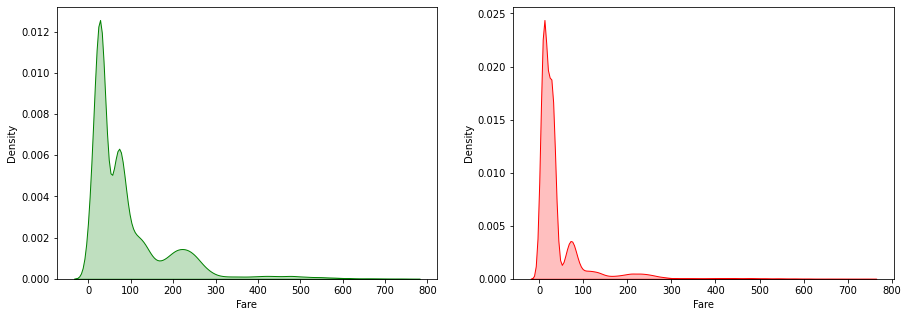

In [67]:
fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(1, 2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])


sns.kdeplot(x = f_noNullCabin['Fare'], fill = True, color = 'green', ax = ax0)
sns.kdeplot(x=f['Fare'], fill = True, color = 'red', ax = ax1)

### As data changes significantly. Nan Cabins should be left untouched.

In [68]:
f.drop(columns='Cabin', inplace = True)  

# Checking for outliers and mistakes

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

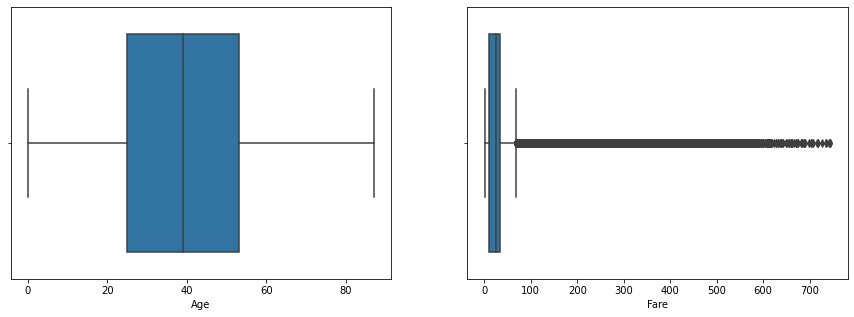

In [69]:
fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(1,2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.boxplot(f['Age'], ax=ax0)
sns.boxplot(f['Fare'], ax = ax1)

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='Count'>

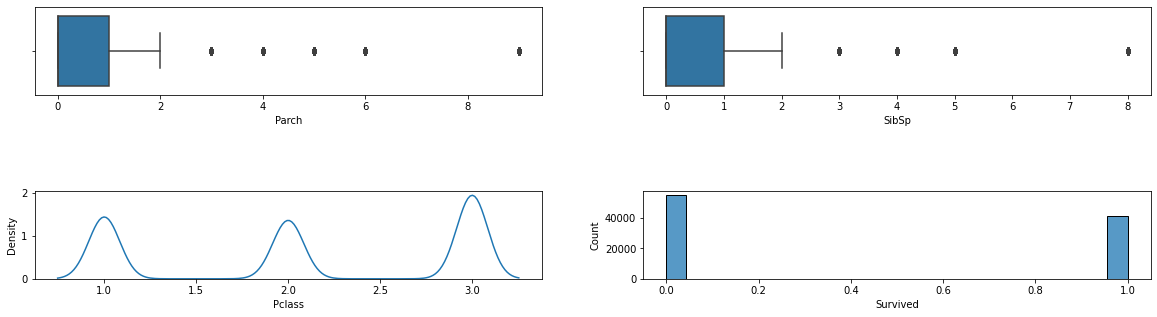

In [70]:
fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(2,2, hspace = 1.1)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

sns.boxplot(f['Parch'], ax=ax0)
sns.boxplot(f['SibSp'], ax = ax1)
sns.kdeplot(f['Pclass'], ax=ax2)
sns.histplot(f['Survived'], ax = ax3)

I consider Porch and SibSp greater than 6 as outliers and drop it

In [71]:
f.drop(f[f['Parch']>6].index, inplace = True)
 

In [72]:
f.drop(f[f['SibSp']>6].index, inplace = True)

## In order to deal with "Fare" outliers - I will create different money category: f_super_econom, economy, usual, wealthy, super_wealthy. 
### It looks like there are more money categories, than Pclasses

With log_scale we can see groups distribution with 4 peaks. later recear has suggested 5 peaks, so it was extended

[Text(0.5, 1.0, 'Bins')]

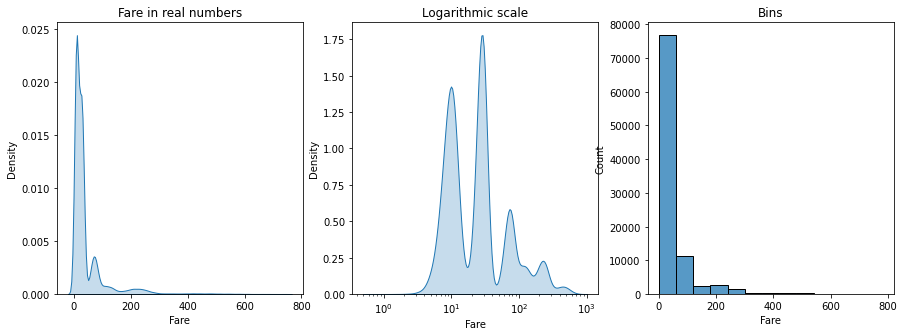

In [73]:
fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(1, 3)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
 
sns.kdeplot(x = f['Fare'], fill = True, ax = ax0).set(title  = "Fare in real numbers")
sns.kdeplot(x = f['Fare'], fill = True, log_scale = True,ax =  ax1).set(title  = "Logarithmic scale")
sns.histplot(x = f['Fare'], fill = True,ax =  ax2, binwidth=60).set(title  = "Bins")

 

In [74]:
f['Fare'].median()

24.44

In [75]:
f_super_wealthy = f[f['Fare']>300]
f_wealthy = f[(f['Fare']<=300 )& (f['Fare']>150)]
f_usual = f[(f['Fare']<=150 )& (f['Fare']>40)]
f_econom = f[(f['Fare']<=40 )& (f['Fare']>19)]
f_super_econom = f[f['Fare']<=19]


In [76]:
def wealth_cat(x):
    if x <=19:
        return 'S_Econom'
    elif x <=40:
        return 'Econom'
    elif x <=150:
        return 'Usual'
    elif x <=300:
        return 'Wealthy'
    else:
        return 'S_Wealthy'


In [77]:
f['Class'] = f['Fare'].apply(wealth_cat)

Text(0.5, 0.98, 'All class')

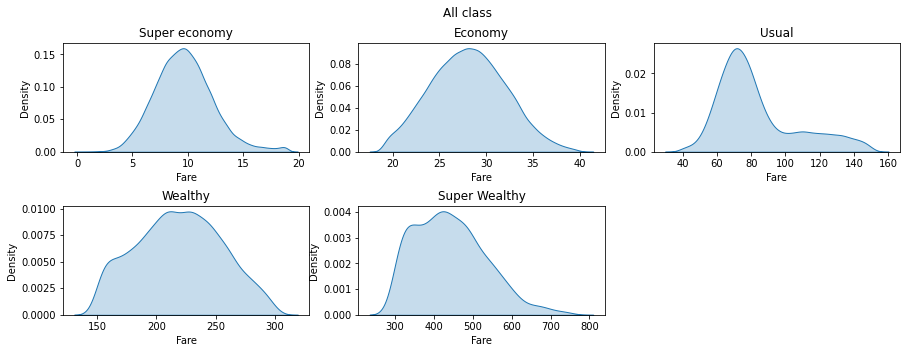

In [78]:
fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(2, 3, hspace = 0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

sns.kdeplot(x = f_super_econom['Fare'], fill = True, ax = ax0).set(title='Super economy')
sns.kdeplot(x = f_econom['Fare'], fill = True, ax = ax1).set(title='Economy')
sns.kdeplot(x = f_usual['Fare'], fill = True, ax =  ax2).set(title='Usual')
sns.kdeplot(x = f_wealthy['Fare'], fill = True, ax = ax3).set(title='Wealthy')
sns.kdeplot(x = f_super_wealthy['Fare'], fill = True,ax =  ax4).set(title='Super Wealthy')

fig.suptitle('All class')

# Summary statistics

In [79]:
f[['Age', 'Fare']].describe()

,Age,Fare
count,95784.000000,95784.000000
mean,38.374685,43.908516
std,18.299522,69.549440
min,0.080000,0.680000
25%,25.000000,10.020000
50%,39.000000,24.440000
75%,53.000000,33.510000
max,87.000000,744.660000


<AxesSubplot:xlabel='Parch', ylabel='Count'>

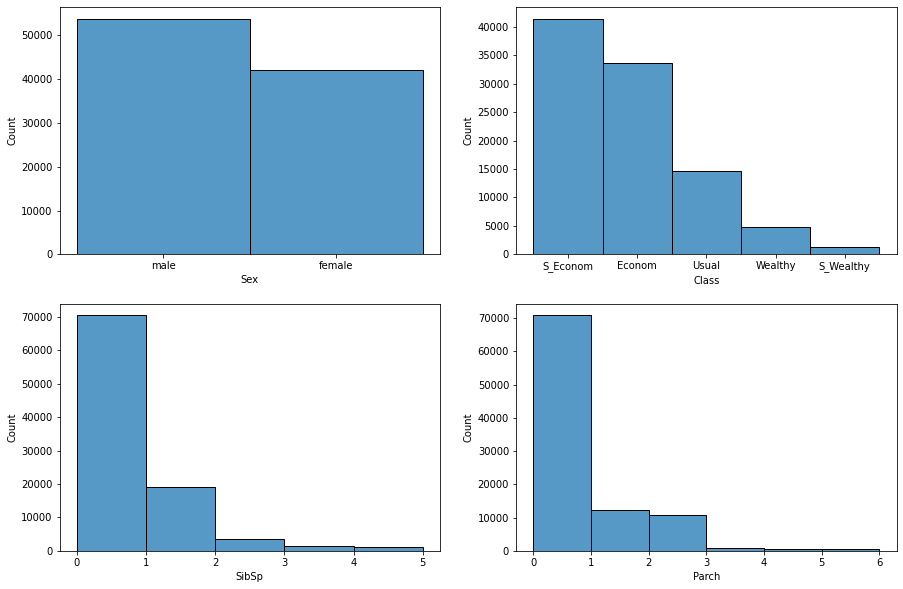

In [80]:
f['Class'] = pd.Categorical(f['Class'], ['S_Econom','Econom','Usual','Wealthy', 'S_Wealthy'])

fig = plt.figure(figsize=(15,10))
gs = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
 
sns.histplot(x = f['Sex'], ax=ax0)
sns.histplot(x = f['Class'], ax=ax1)
sns.histplot(x = f['SibSp'], ax=ax2, binwidth=1)
sns.histplot(x = f['Parch'], ax=ax3, binwidth=1)


# How is the Data connected

We can see that while the majority of passengers were males, their distribution is uneven. In the super economy category, there were twice more males than females

Text(0.5, 0.98, 'Sex VS Class')

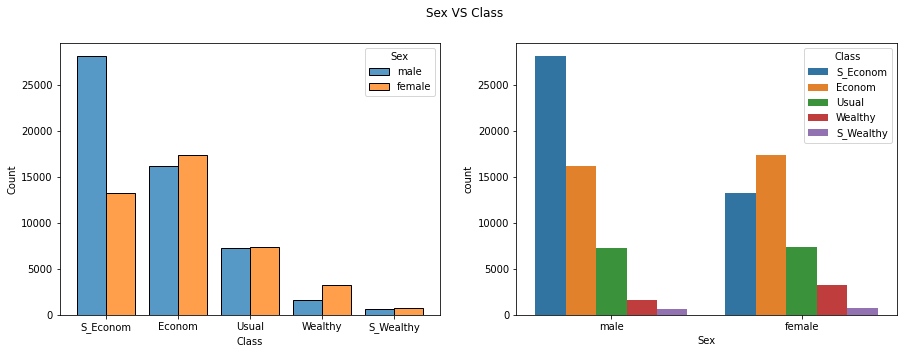

In [81]:
fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(1, 2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.histplot(x = f['Class'], hue = f['Sex'],  multiple="dodge", shrink=.8, ax = ax0)
sns.countplot( x="Sex", hue="Class",  data=f, ax = ax1)

fig.suptitle('Sex VS Class')


In [82]:
def age(x):
    if x <=18:
        return '18 and under'
    elif x <=40:
        return '18 - 40'
    elif x <=65:
        return '40 - 65'
    else:
        return '65+'


f['Age_group'] = f['Age'].apply(age)
f['Age_group'] = pd.Categorical(f['Age_group'], ['18 and under','18 - 40','40 - 65','65+'])

Text(0.5, 0.98, 'Age and Class')

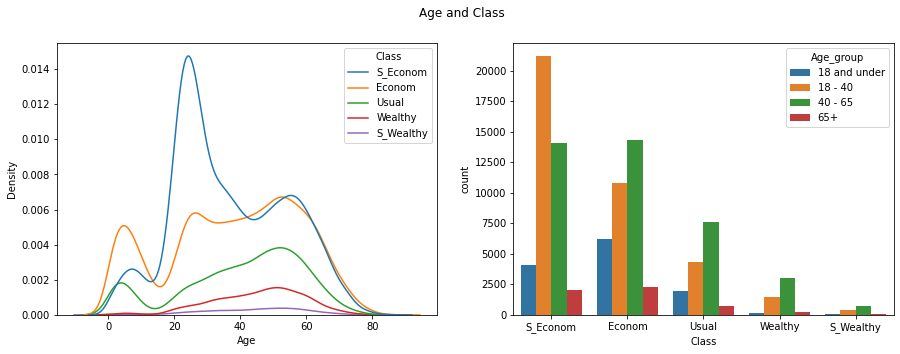

In [83]:
fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(1, 2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.kdeplot( x="Age", hue="Class",  data=f, ax = ax0)
sns.countplot( hue="Age_group", x="Class", data=f,  ax = ax1)

fig.suptitle('Age and Class')

In [84]:


def not_alone(x):
    if x>0:
        return 'Not_alone'
    else: return 'Alone'
    

def wife(x):
    if x>0:
        return 'with spose'
def kids_parents(x):
    if x>0:
        return 'with kids or parents'

f['Not_Alone'] = f['SibSp'].apply(not_alone)
f['Not_Alone'] = f['Parch'].apply(not_alone)

f['Spouse'] = f['SibSp'].apply(wife)
f['kids_parents'] = f['Parch'].apply(kids_parents)


f['Total_family'] = f['SibSp'] + f['Parch']

Text(0.5, 1.0, 'How many family members?')

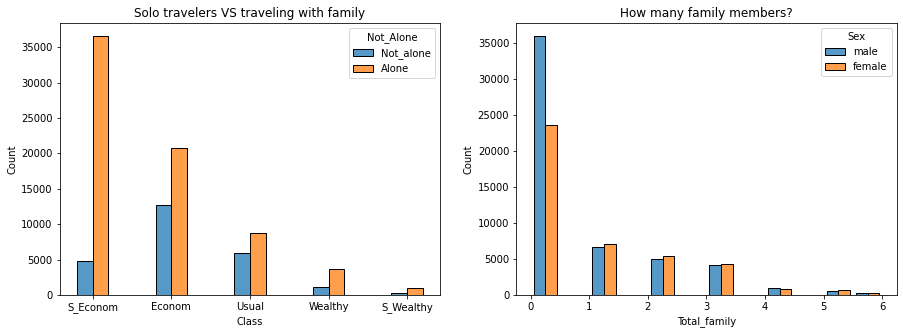

In [85]:
fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(1, 2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])



data_with_family  = f.drop(f[f['Total_family']==0].index)
data_alone = f[f['Total_family']==0]
f.drop(f[f['Total_family']>6].index, inplace = True)

sns.histplot(x = f['Class'], hue = f['Not_Alone'],  multiple="dodge", shrink=.4, ax =ax0).set_title('Solo travelers VS traveling with family')
sns.histplot(x = f['Total_family'], hue = f['Sex'],multiple="dodge", shrink=.8,  ax =ax1, binwidth=0.5).set_title('How many family members?')

 

# Survival

We can clearly see that among all classes more women survived than men. And that being wealthy also improved the chances for survival. Being a child didn't significantly improve your survival rates. While being an old lady did.

In [86]:
def survived(x):
    if x>0:
        return 'Survived'
    else: return 'Died'

f['Survival'] = f['Survived'].apply(survived)

Text(0.5, 1.0, 'Survival rates with class')

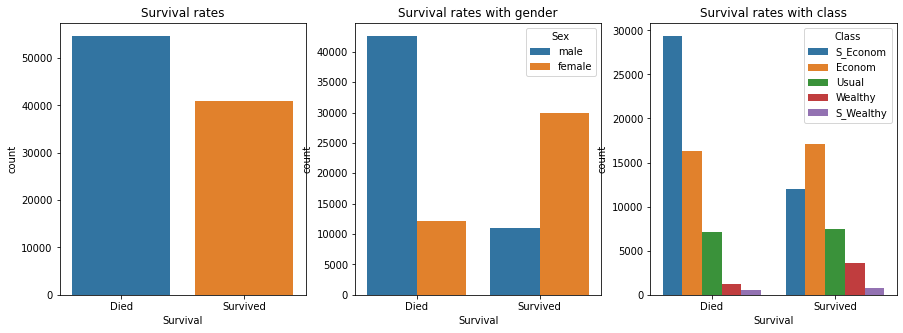

In [87]:
fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(1, 3)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])


sns.countplot(data = f, x= 'Survival', ax=ax0).set_title('Survival rates')
sns.countplot(data = f, x= 'Survival',hue = 'Sex', ax=ax1).set_title('Survival rates with gender')
sns.countplot(data = f, x= 'Survival',hue = 'Class', ax=ax2).set_title('Survival rates with class')

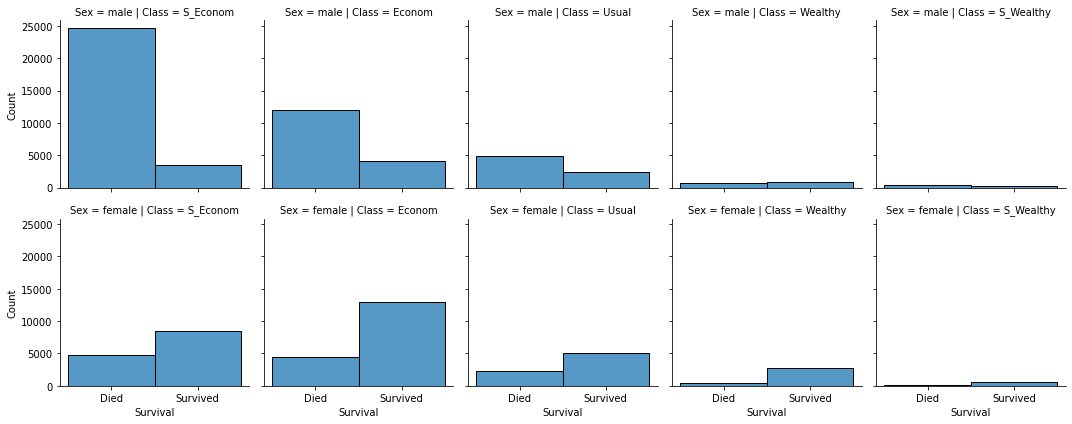

In [88]:
g = sns.FacetGrid(f, col="Class",  row="Sex")
g.figure.subplots_adjust(wspace=0, hspace=0.2)
g.map_dataframe(sns.histplot, x="Survival")
 

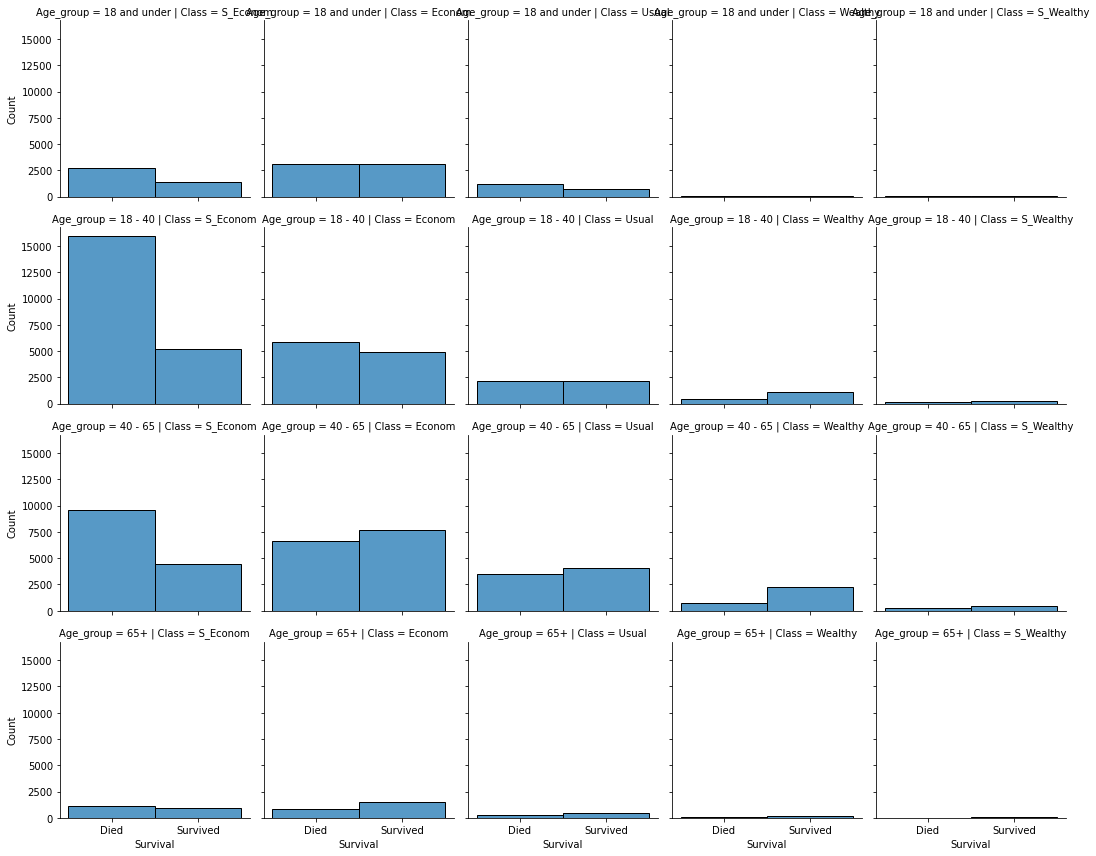

In [89]:
g = sns.FacetGrid(f, col="Class",  row="Age_group")

g.map_dataframe(sns.histplot, x="Survival")

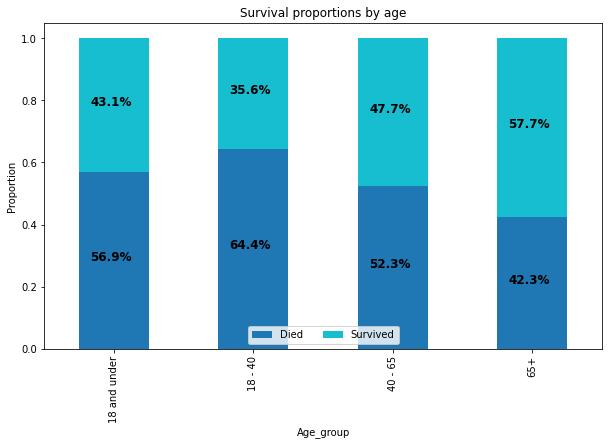

In [90]:
cross_tab = pd.crosstab(index=f['Age_group'],
                        columns=f['Survival'])


cross_tab_prop = pd.crosstab(index=f['Age_group'],
                             columns=f['Survival'],
                             normalize="index")

 

cross_tab_prop.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(10, 6))

plt.legend(loc="lower center", ncol=2)
plt.title('Survival proportions by age')
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

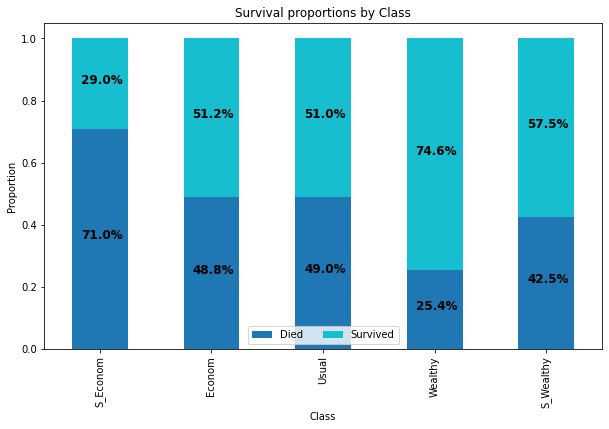

In [91]:
cross_tab = pd.crosstab(index=f['Class'],
                        columns=f['Survival'])


cross_tab_prop = pd.crosstab(index=f['Class'],
                             columns=f['Survival'],
                             normalize="index")

 

cross_tab_prop.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(10, 6))

plt.legend(loc="lower center", ncol=2)
plt.title('Survival proportions by Class')
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

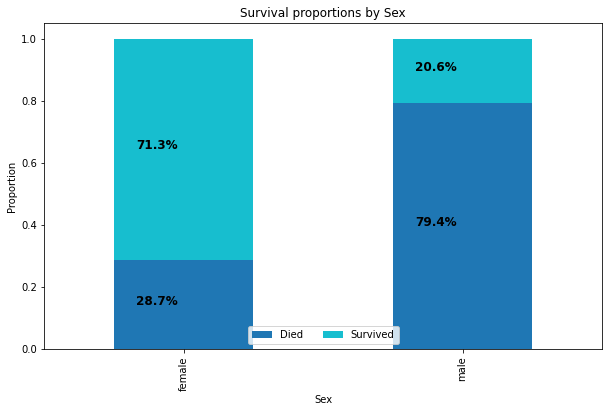

In [92]:
cross_tab = pd.crosstab(index=f['Sex'],
                        columns=f['Survival'])


cross_tab_prop = pd.crosstab(index=f['Sex'],
                             columns=f['Survival'],
                             normalize="index")

 

cross_tab_prop.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(10, 6))

plt.legend(loc="lower center", ncol=2)
plt.title('Survival proportions by Sex') 
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

In [105]:
def sex(x):
    if x == 'male':
        return 0
    else:
        return 1


f['Sex_0/1'] = f['Sex'].apply(sex)

def class_numbers(x):
    if x == 'S_Econom':
        return 0
    elif x == 'Econom':
        return 1
    elif x == 'Usual':
        return 2
    elif x == 'Wealthy':
        return 3
    else:
        return 4

f['Class 0-4'] = f['Class'].apply(class_numbers).astype('int64')

 


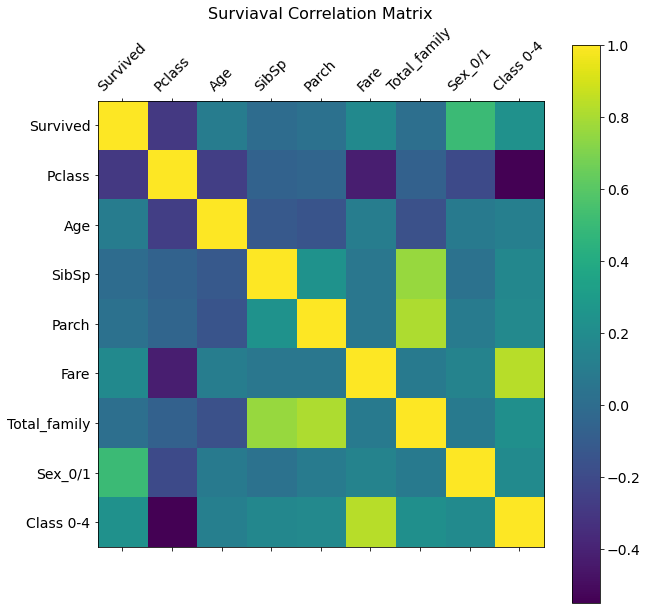

In [108]:
fug = plt.figure(figsize=(10, 10))
plt.matshow(f.corr(), fignum=fig.number)
plt.xticks(range(f.select_dtypes(['number']).shape[1]), f.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(f.select_dtypes(['number']).shape[1]), f.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Surviaval Correlation Matrix', fontsize=16);

That correlation matrix shows, that it was the right decision to define more classes than initially given 3, as it shows a more powerful correlation.